In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

pd.options.mode.chained_assignment = None

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import*
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline

In [3]:
from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.ensemble import*
from sklearn.neighbors import*
from sklearn import svm
from sklearn.naive_bayes import*
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
df=pd.read_csv("avocado.csv")

In [5]:
print(df)

       Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  

In [6]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [8]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [9]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [11]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [14]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

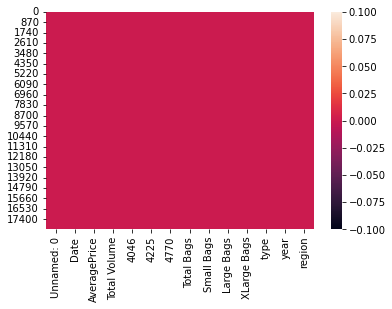

In [15]:
sns.heatmap(df.isnull());

In [16]:
print("total number of duplicate values:",sum(df.duplicated()))

total number of duplicate values: 0


In [18]:
df=df.drop(['Unnamed: 0'], axis=1)

In [19]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


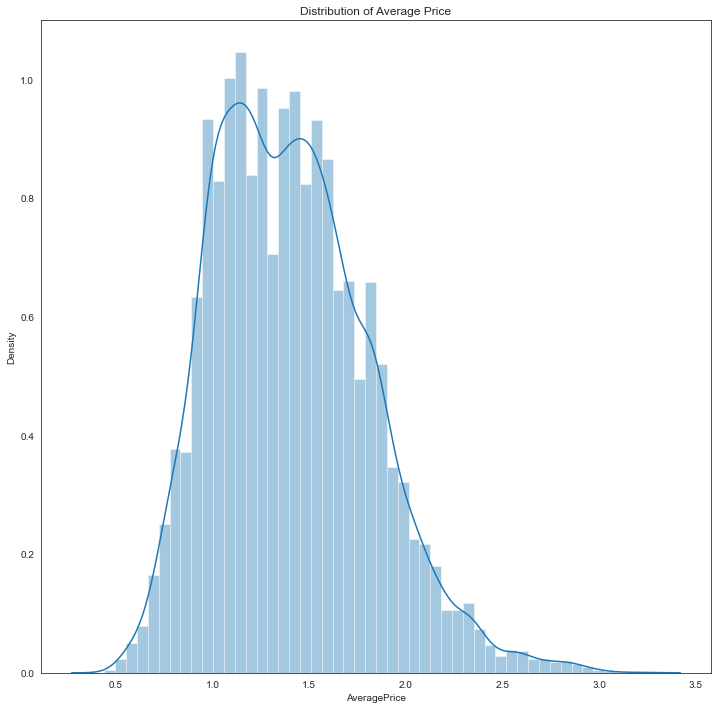

In [23]:
sns.set_style("white")
plt.figure(figsize=(12,12))
sns.distplot(df.AveragePrice)
plt.title("Distribution of Average Price",fontsize=12);

In [25]:
import statsmodels.api as sm

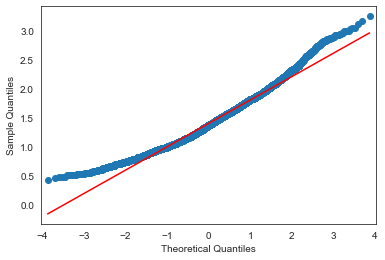

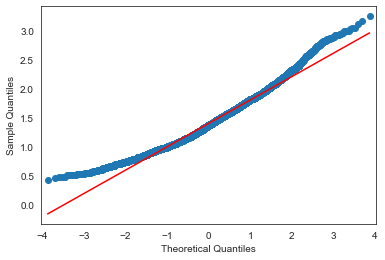

In [27]:

sm.qqplot(df.AveragePrice,line="s")


In [29]:
mean =df.AveragePrice.mean()
std = df.AveragePrice.std()
lower,upper = mean-std*2,mean+std*2
print("Lower Limit : {} Upper Limit : {}".format(lower,upper))

Lower Limit : 0.6006252987847824 Upper Limit : 2.211331520766983


In [30]:
outliers = [x for x in df.AveragePrice if x < lower or x> upper]
print("Outlier values:{}".format(outliers))

Outlier values:[0.49, 0.53, 0.56, 0.6, 0.58, 0.56, 0.54, 0.53, 0.52, 0.56, 0.58, 0.6, 0.53, 0.51, 0.57, 0.57, 0.6, 0.6, 0.56, 0.58, 0.6, 0.6, 0.54, 0.58, 0.59, 0.58, 0.58, 0.58, 0.56, 0.58, 0.6, 0.58, 0.55, 0.57, 0.54, 0.56, 0.54, 0.56, 0.51, 0.57, 0.55, 0.59, 0.56, 2.22, 0.6, 0.53, 0.58, 0.55, 0.53, 0.57, 0.51, 0.54, 0.53, 0.6, 0.6, 0.6, 0.57, 0.54, 0.46, 0.58, 0.54, 0.6, 0.52, 0.56, 0.58, 0.56, 0.59, 0.58, 0.59, 0.59, 2.28, 2.35, 2.29, 2.24, 2.29, 2.29, 2.24, 2.32, 2.24, 2.34, 2.33, 2.31, 2.23, 2.27, 2.3, 2.41, 2.31, 2.36, 2.37, 2.33, 2.31, 2.39, 2.31, 2.42, 2.39, 2.45, 2.38, 2.4, 2.31, 2.4, 2.25, 2.34, 2.24, 2.36, 2.3, 2.31, 2.24, 2.27, 2.27, 2.26, 2.38, 2.37, 2.35, 2.28, 2.32, 2.26, 2.31, 2.22, 2.31, 2.4, 2.34, 2.25, 2.22, 2.24, 2.28, 2.3, 2.24, 2.34, 2.31, 2.24, 2.58, 2.79, 2.66, 2.59, 2.74, 2.79, 2.73, 2.73, 2.77, 2.71, 2.73, 2.72, 2.76, 2.75, 2.36, 2.23, 2.25, 2.29, 2.28, 2.24, 2.37, 2.49, 2.58, 2.3, 2.3, 2.25, 2.24, 2.23, 2.26, 2.28, 2.22, 2.41, 2.36, 2.54, 2.42, 2.67, 2.3, 2.6

In [32]:
df_exclude = df[(df.AveragePrice<upper)|(df.AveragePrice>lower)]

In [33]:
df_exclude.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [34]:
df_exclude.shape

(18249, 13)

In [35]:
df.shape

(18249, 13)

In [53]:
quantile = np.quantile(df.AveragePrice,[0.25,0.5,0.75,1]) # Use numpy quantile
IQR = quantile[2] - quantile[0] # Calculate IQR through third quantile - first quantile
upper = 1.5*IQR + quantile[2]
lower = quantile[0] - 1.5*IQR

print("Upper bound : {} Lower bound : {}".format(upper,lower))

outlier = [x for x in df.AveragePrice if x < lower or x>upper]
print("\nOutlier values :\n {}".format(outliers))

Upper bound : 2.4999999999999996 Lower bound : 0.26000000000000034

Outlier values :
 [0.49, 0.53, 0.56, 0.6, 0.58, 0.56, 0.54, 0.53, 0.52, 0.56, 0.58, 0.6, 0.53, 0.51, 0.57, 0.57, 0.6, 0.6, 0.56, 0.58, 0.6, 0.6, 0.54, 0.58, 0.59, 0.58, 0.58, 0.58, 0.56, 0.58, 0.6, 0.58, 0.55, 0.57, 0.54, 0.56, 0.54, 0.56, 0.51, 0.57, 0.55, 0.59, 0.56, 2.22, 0.6, 0.53, 0.58, 0.55, 0.53, 0.57, 0.51, 0.54, 0.53, 0.6, 0.6, 0.6, 0.57, 0.54, 0.46, 0.58, 0.54, 0.6, 0.52, 0.56, 0.58, 0.56, 0.59, 0.58, 0.59, 0.59, 2.28, 2.35, 2.29, 2.24, 2.29, 2.29, 2.24, 2.32, 2.24, 2.34, 2.33, 2.31, 2.23, 2.27, 2.3, 2.41, 2.31, 2.36, 2.37, 2.33, 2.31, 2.39, 2.31, 2.42, 2.39, 2.45, 2.38, 2.4, 2.31, 2.4, 2.25, 2.34, 2.24, 2.36, 2.3, 2.31, 2.24, 2.27, 2.27, 2.26, 2.38, 2.37, 2.35, 2.28, 2.32, 2.26, 2.31, 2.22, 2.31, 2.4, 2.34, 2.25, 2.22, 2.24, 2.28, 2.3, 2.24, 2.34, 2.31, 2.24, 2.58, 2.79, 2.66, 2.59, 2.74, 2.79, 2.73, 2.73, 2.77, 2.71, 2.73, 2.72, 2.76, 2.75, 2.36, 2.23, 2.25, 2.29, 2.28, 2.24, 2.37, 2.49, 2.58, 2.3, 2.3, 2.2

In [55]:
df_exclude2 = df[(df.AveragePrice > lower) | (df.AveragePrice < upper)]
df_exclude2

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


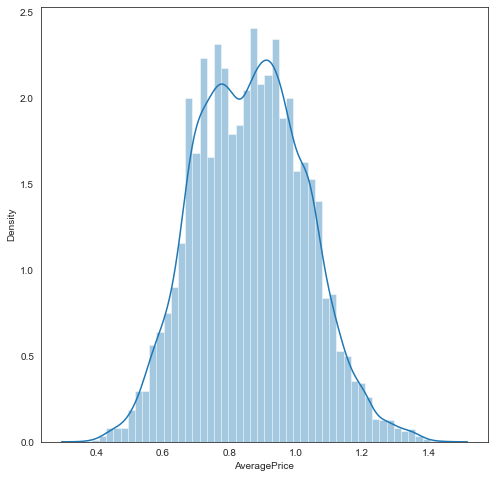

In [56]:
log_df = np.log(df.AveragePrice+1)
sns.set_style("white")
plt.figure(figsize=(8,8))
sns.distplot(log_df);

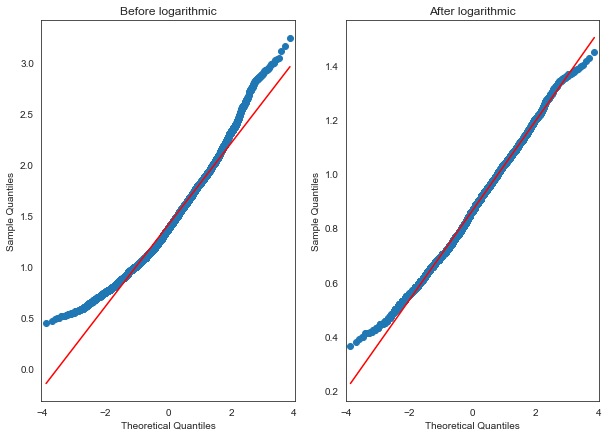

In [57]:
fig,ax = plt.subplots(1,2,figsize=(10,7))
sm.qqplot(df.AveragePrice,line="s",ax=ax[0])
ax[0].set_title("Before logarithmic")
sm.qqplot(log_df,line="s",ax=ax[1])
ax[1].set_title("After logarithmic");

In [59]:
len(df.region.unique())

54

In [62]:
df.groupby("region").size()

region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

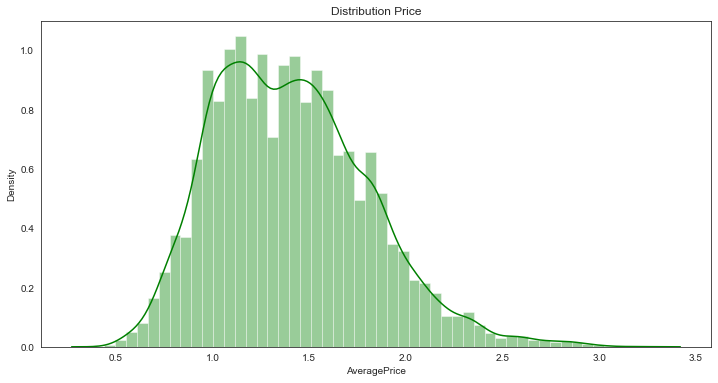

In [65]:
plt.figure(figsize=(12,6))
plt.title("Distribution Price")
ax = sns.distplot(df["AveragePrice"],color="g")

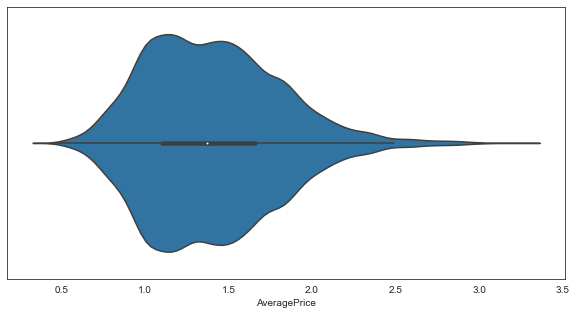

In [68]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.violinplot(df.dropna(subset = ['AveragePrice']).AveragePrice);


             Feature Engineering for Model building

In [72]:
df["region"].nunique()

54

In [73]:
df["type"].nunique()

2

In [74]:
df_final = pd.get_dummies(df.drop(["region","Date"],axis=1),drop_first=True)

In [75]:
df_final.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0


In [76]:
df_final.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_organic
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,2018,1


             Model selection/predictions

In [78]:
X=df_final.iloc[:,1:14]
y=df_final['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

                Creating and Training the Model

In [82]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [85]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.24097655032684206
MSE: 0.09760990350813813
RMSE: 0.31242583681273567


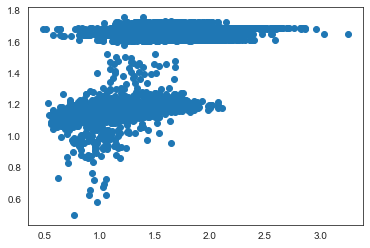

In [89]:
plt.scatter(x=y_test,y=pred)

In [91]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0, 0.5, 'Predicted y')

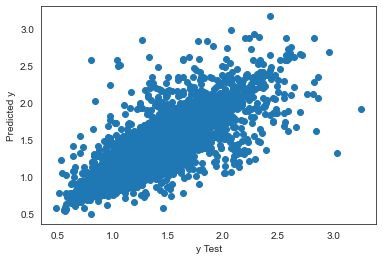

In [94]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('y Test')
plt.ylabel('Predicted y')

In [95]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.15887397260273972
MSE: 0.0615621095890411
RMSE: 0.24811712876994424


In [98]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [99]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


MAE: 0.1231101095890411
MSE: 0.0315926230109589
RMSE: 0.17774313773239994


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

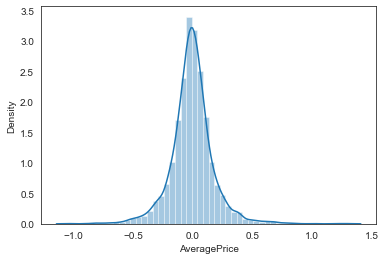

In [100]:
sns.distplot((y_test-pred),bins=50)

,Y Test,Pred
8604,0.82,1.0139
2608,0.97,1.0050
14581,1.44,1.3930
4254,0.97,0.9092
16588,1.45,1.4736


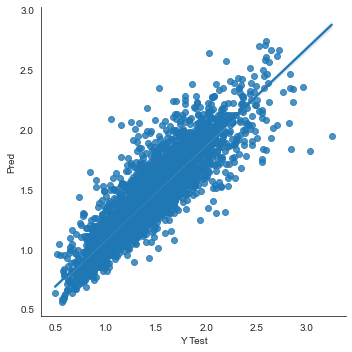

In [104]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()